In [1]:
import pandas as pd

df = pd.read_csv('/content/Oxygen_Data (1).csv')
print(df.head())
print(df.describe())

   patient_id_deident  OXYGEN_room_air_0  OXYGEN_room_air_1  \
0                   3                1.0                NaN   
1                   5                1.0                NaN   
2                  10                1.0                NaN   
3                  21                1.0                NaN   
4                  29                1.0                1.0   

   OXYGEN_room_air_2  OXYGEN_room_air_3  OXYGEN_room_air_4  OXYGEN_room_air_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

   OXYGEN_room_air_6  OXYGEN_room_air_7  OXYGEN_room_air_8  ...  \
0                NaN                NaN                NaN  ...   


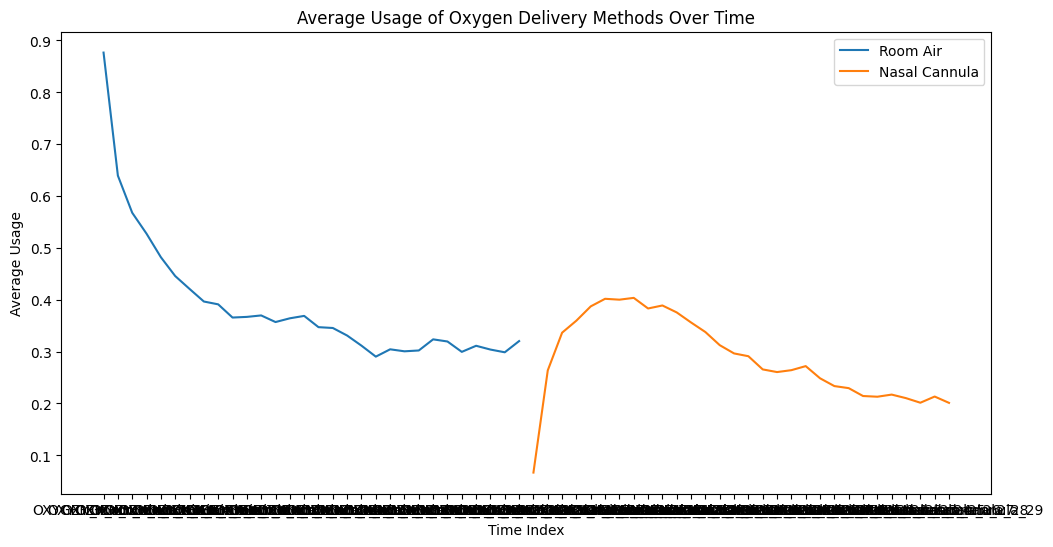

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting columns related to different oxygen delivery methods and their time indices
columns_room_air = [col for col in df.columns if 'OXYGEN_room_air' in col]
columns_nasal_cannula = [col for col in df.columns if 'OXYGEN_nasal_cannula' in col]

# Calculating average usage over time for each method
average_room_air = df[columns_room_air].mean()
average_nasal_cannula = df[columns_nasal_cannula].mean()

# Plotting
plt.figure(figsize=(12, 6), facecolor='white')
plt.plot(average_room_air.index, average_room_air.values, label='Room Air')
plt.plot(average_nasal_cannula.index, average_nasal_cannula.values, label='Nasal Cannula')
plt.title('Average Usage of Oxygen Delivery Methods Over Time')
plt.xlabel('Time Index')
plt.ylabel('Average Usage')
plt.legend()
plt.show()

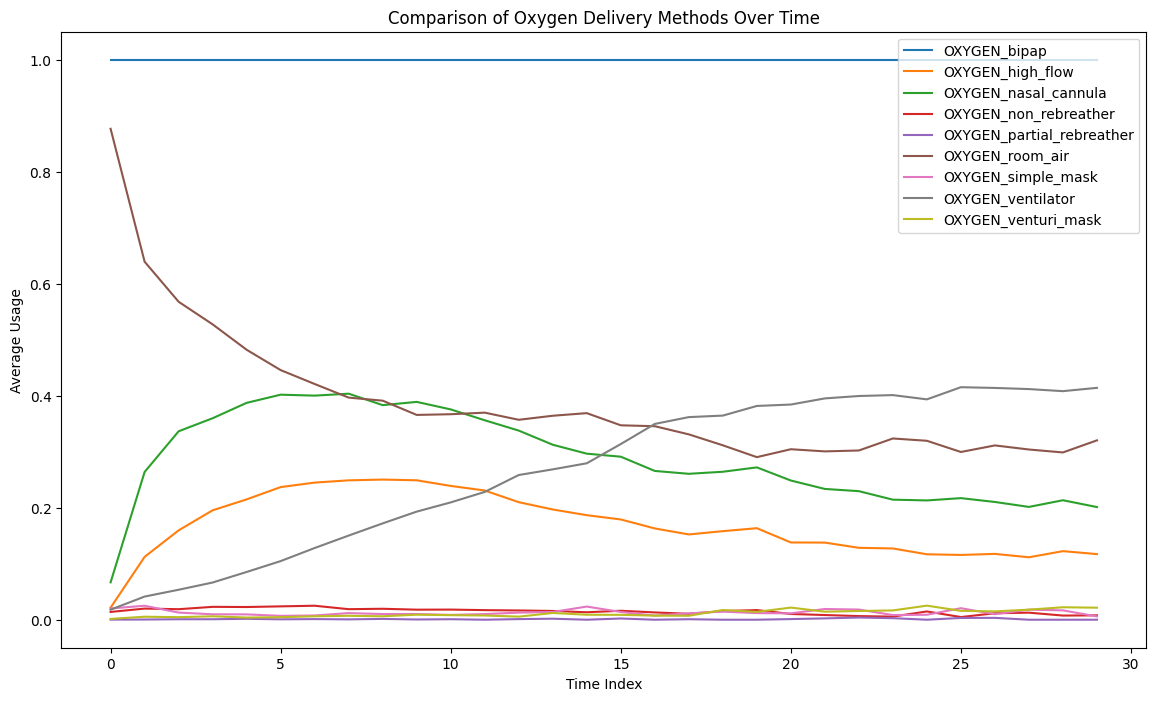

In [4]:
# Extracting all columns related to oxygen delivery methods
columns_oxygen_methods = [col for col in df.columns if 'OXYGEN' in col]

# Calculating average usage over time for each method
average_usage = df[columns_oxygen_methods].mean()

# Reshaping the data for easier plotting
average_usage_df = average_usage.reset_index()
average_usage_df[['Method', 'Time']] = average_usage_df['index'].str.rsplit('_', n=1, expand=True)
average_usage_df['Time'] = average_usage_df['Time'].astype(int)
average_usage_df = average_usage_df.pivot(index='Time', columns='Method', values=0)

# Plotting
plt.figure(figsize=(14, 8), facecolor='white')
for column in average_usage_df.columns:
    plt.plot(average_usage_df.index, average_usage_df[column], label=column)
plt.title('Comparison of Oxygen Delivery Methods Over Time')
plt.xlabel('Time Index')
plt.ylabel('Average Usage')
plt.legend()
plt.show()